# Distribuciones y análisis univariado

## **Ejercicio**: Análisis completo de distribuciones y outliers en dataset financiero

### Crear y explorar dataset financiero

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
# Crear dataset de transacciones financieras
np.random.seed(42)
n_transacciones = 2000

In [47]:
# Transacciones normales (distribución normal)
transacciones_normales = np.random.normal(150, 50, n_transacciones//2)

In [48]:
# Transacciones de lujo (distribución log-normal)
transacciones_lujo = np.random.lognormal(5.5, 0.8, n_transacciones//2)

In [49]:
# Combinar datasets
montos = np.concatenate([transacciones_normales, transacciones_lujo])

In [50]:
# Crear DataFrame
df = pd.DataFrame({
    'id_transaccion': range(1, len(montos) + 1),
    'monto': np.round(montos, 2),
    'tipo_cliente': np.random.choice(['Regular', 'Premium', 'VIP'], len(montos)),
    'categoria': np.random.choice(['Alimentos', 'Electrónicos', 'Ropa', 'Servicios'], len(montos))
})

print(f"Dataset creado: {len(df)} transacciones")
print(f"Rango de montos: ${df['monto'].min():.2f} - ${df['monto'].max():.2f}")

Dataset creado: 2000 transacciones
Rango de montos: $-12.06 - $3147.88


### Análisis de distribuciones y medidas de forma

In [51]:
# Estadísticos descriptivos
print("ANÁLISIS DESCRIPTIVO")
print("=" * 25)
print(df['monto'].describe())

ANÁLISIS DESCRIPTIVO
count    2000.000000
mean      252.769495
std       252.807549
min       -12.060000
25%       126.240000
50%       175.125000
75%       262.682500
max      3147.880000
Name: monto, dtype: float64


In [52]:
# Medidas de forma
print("\nMEDIDAS DE FORMA")
print("=" * 20)
skewness = df['monto'].skew()
kurtosis = df['monto'].kurtosis()

print(f"Asimetría (Skewness): {skewness:.3f}")
print(f"  Interpretación: {'Sesgo positivo (cola derecha)' if skewness > 0 else 'Sesgo negativo (cola izquierda)' if skewness < 0 else 'Simétrica'}")

print(f"Curtosis: {kurtosis:.3f}")
print(f"  Interpretación: {'Leptocúrtica (colas pesadas)' if kurtosis > 0 else 'Platicúrtica (colas ligeras)' if kurtosis < 0 else 'Mesocúrtica (normal)'}")



MEDIDAS DE FORMA
Asimetría (Skewness): 4.014
  Interpretación: Sesgo positivo (cola derecha)
Curtosis: 25.445
  Interpretación: Leptocúrtica (colas pesadas)


In [53]:
# Comparación media vs mediana
media = df['monto'].mean()
mediana = df['monto'].median()

print(f"\nMedia: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Diferencia: ${media - mediana:.2f} ({((media - mediana) / mediana * 100):.1f}%)")


Media: $252.77
Mediana: $175.12
Diferencia: $77.64 (44.3%)


### Detección de outliers con múltiples métodos

In [54]:
# Método IQR
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

limite_inf_iqr = Q1 - 1.5 * IQR
limite_sup_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['monto'] < limite_inf_iqr) | (df['monto'] > limite_sup_iqr)]


In [55]:

# Método Z-Score
z_scores = stats.zscore(df['monto'])
outliers_zscore = df[abs(z_scores) > 3]

print("\nDETECCIÓN DE OUTLIERS")
print("=" * 25)
print(f"Método IQR: {len(outliers_iqr)} outliers")
print(f"  Límite inferior: ${limite_inf_iqr:.2f}")
print(f"  Límite superior: ${limite_sup_iqr:.2f}")

print(f"\nMétodo Z-Score (|z| > 3): {len(outliers_zscore)} outliers")



DETECCIÓN DE OUTLIERS
Método IQR: 229 outliers
  Límite inferior: $-78.42
  Límite superior: $467.35

Método Z-Score (|z| > 3): 41 outliers


In [56]:
# Comparar métodos
outliers_comunes = set(outliers_iqr.index) & set(outliers_zscore.index)
print(f"Outliers detectados por ambos métodos: {len(outliers_comunes)}")

Outliers detectados por ambos métodos: 41


### Análisis por categorías

In [57]:
print("\nANÁLISIS POR CATEGORÍA")
print("=" * 25)

# Usar named aggregation y lambdas para skew y kurtosis para evitar errores de atributo
categoria_stats = df.groupby('categoria').agg(
    count=('monto', 'count'),
    mean=('monto', 'mean'),
    median=('monto', 'median'),
    std=('monto', 'std'),
    skew=('monto', lambda x: x.skew()),
    kurtosis=('monto', lambda x: x.kurtosis())
).round(3)

print(categoria_stats)


ANÁLISIS POR CATEGORÍA
              count     mean   median      std   skew  kurtosis
categoria                                                      
Alimentos       482  262.608  182.595  243.438  2.907    10.689
Electrónicos    514  247.375  173.040  250.737  4.687    35.573
Ropa            528  260.260  174.835  292.607  4.359    27.036
Servicios       476  240.323  172.460  213.819  2.987    12.837


In [58]:
# Análisis por tipo de cliente
print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_stats = df.groupby('tipo_cliente').agg({
    'monto': ['count', 'mean', 'median', 'skew']
}).round(2)

print(cliente_stats)


ANÁLISIS POR TIPO DE CLIENTE
             monto                      
             count    mean  median  skew
tipo_cliente                            
Premium        650  251.22  173.57  3.39
Regular        676  247.64  175.92  4.68
VIP            674  259.41  177.86  4.06


### Visualización básica de distribuciones


Gráfico guardado como 'distribucion_montos.png'


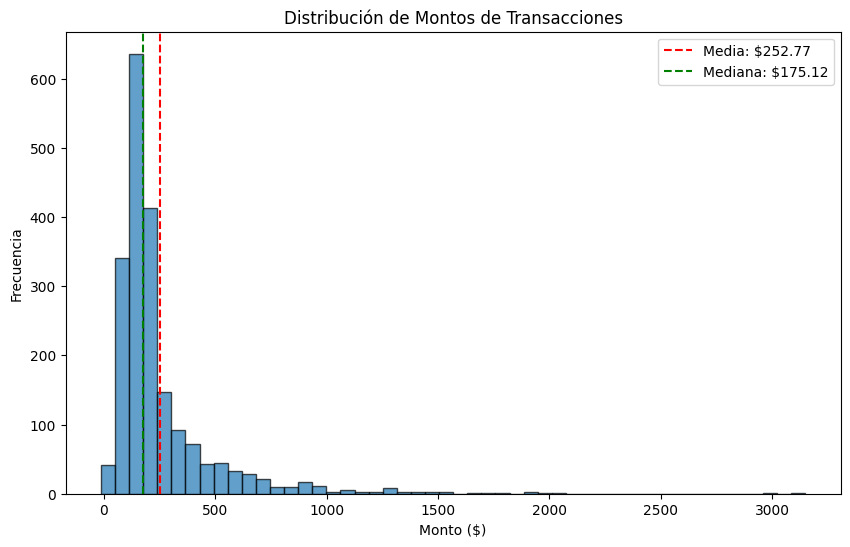

In [59]:
# Histograma simple (si matplotlib está disponible)
try:
    plt.figure(figsize=(10, 6))
    plt.hist(df['monto'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(df['monto'].mean(), color='red', linestyle='--', label=f'Media: ${df["monto"].mean():.2f}')
    plt.axvline(df['monto'].median(), color='green', linestyle='--', label=f'Mediana: ${df["monto"].median():.2f}')
    plt.title('Distribución de Montos de Transacciones')
    plt.xlabel('Monto ($)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.savefig('distribucion_montos.png', dpi=100, bbox_inches='tight')
    print("\nGráfico guardado como 'distribucion_montos.png'")
except ImportError:
    print("\nMatplotlib no disponible - omitiendo visualización")